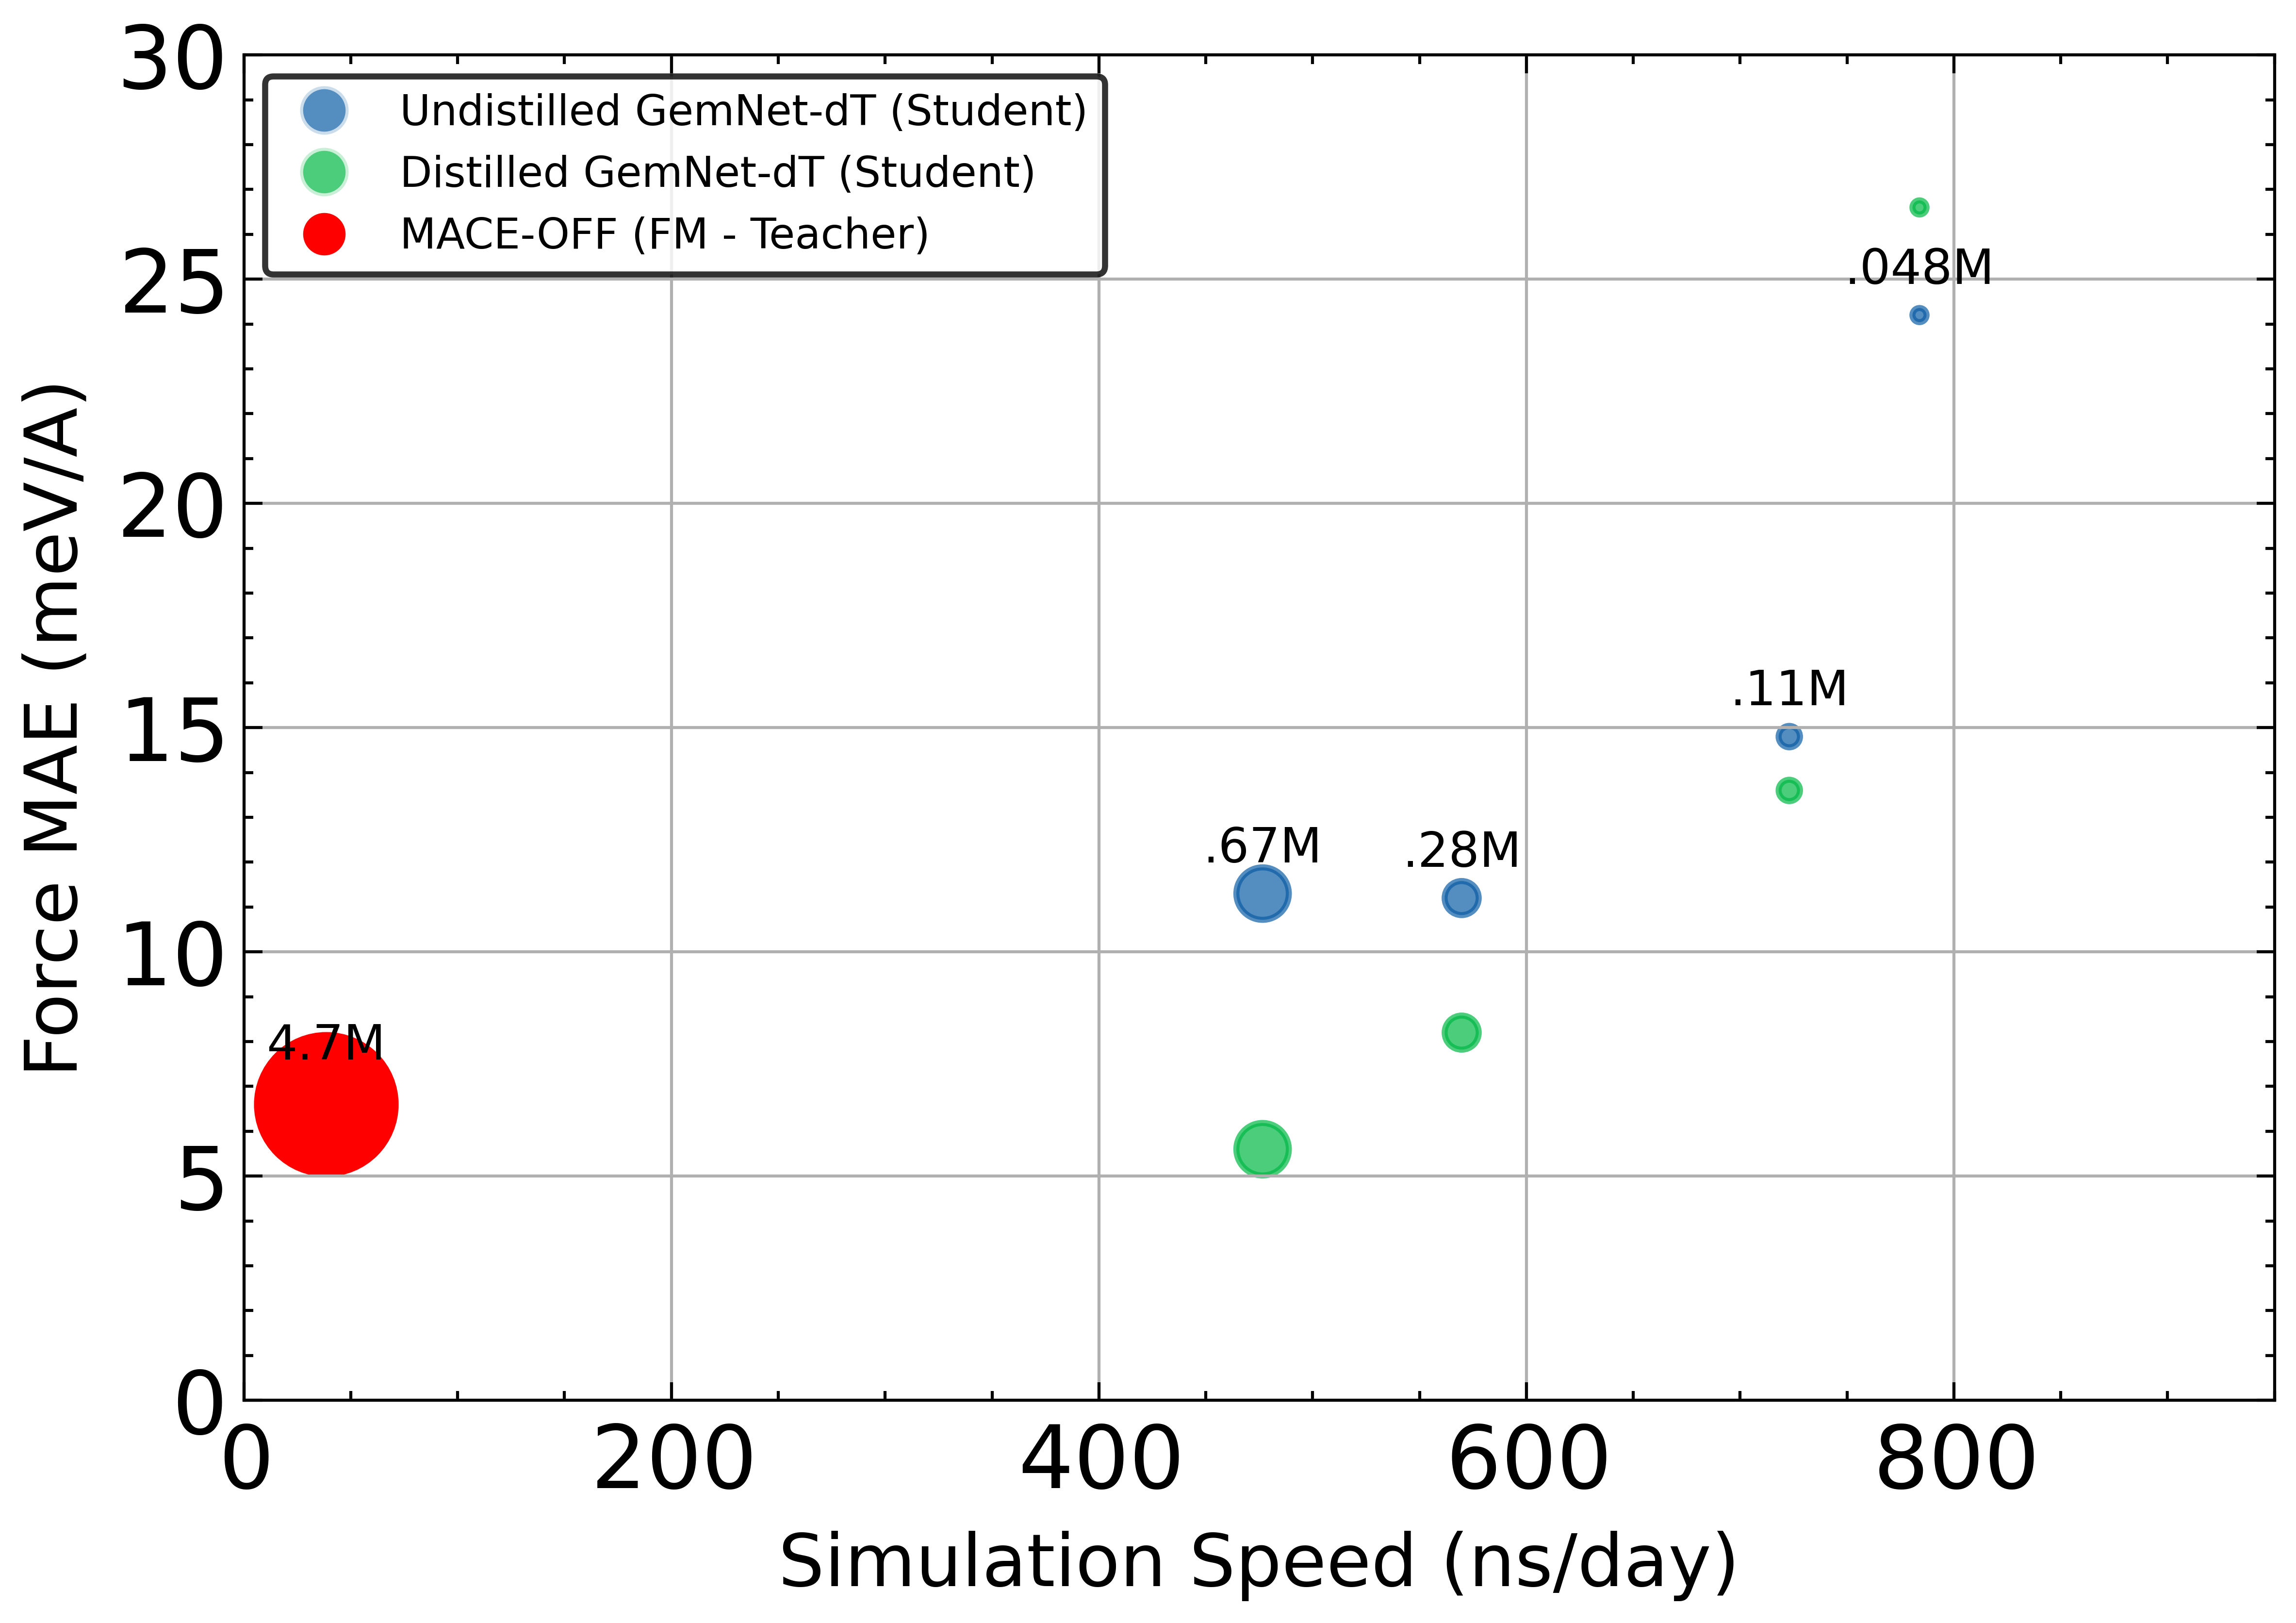

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import scienceplots
import os
import glob
import os
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from math import floor, log10
from tensorboard.backend.event_processing import event_accumulator
import warnings
warnings.filterwarnings("ignore")
plt.style.use(['science','no-latex'])
import matplotlib.pylab as pylab
params = {'figure.dpi': 900,
            'axes.labelsize': 'small',
          'legend.fontsize': 'x-small',
         'axes.titlesize':'medium',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.family': 'DejaVu Sans'}
from matplotlib import rc
pylab.rcParams.update(params)


convert_ns_day = 0.0864


teacher_speed = 38.4
undist_student_speeds = dist_student_speeds =  np.array([5516,6594,8368,9073]) * convert_ns_day


teacher_error = 6.6
undist_student_errors = [11.3, 11.2, 14.8, 24.2]
dist_student_errors = [5.6, 8.2, 13.6, 26.6]
# number of params
student_sizes =  np.array([672918, 283702, 111622, 48622])
teacher_size = 4700000 
teacher_size_abbvr = '4.7M'
student_sizes_abbvr =  np.array(['.67M', '.28M', '.11M', '.048M'])

# Create the plot with varying marker sizes in the plot but fixed sizes in the legend
plt.figure(figsize=(6, 4))

# Scale marker sizes for better visualization
student_marker_sizes = student_sizes / 9000 # Adjust scaling factor for marker sizes
teacher_marker_size = teacher_size / 9000

# Plot undistilled student with adjusted marker sizes
plt.scatter(undist_student_speeds, undist_student_errors, 
            label='Undistilled GemNet-dT (Student)', 
            marker='o', 
            s=student_marker_sizes,  # Marker size proportional to student size
            alpha=0.7)
# Add text annotations for student sizes (Undistilled)
for i, (speed, error, size) in enumerate(zip(undist_student_speeds, undist_student_errors, student_sizes_abbvr)):
    plt.text(speed, error + 0.7, f'{size}', fontsize=8, ha='center')  # Adjust the position of the text slightly above the dots

# Plot distilled student with adjusted marker sizes
plt.scatter(dist_student_speeds, dist_student_errors, 
            label='Distilled GemNet-dT (Student)', 
            marker='o', 
            s=student_marker_sizes,  # Marker size proportional to student size
            alpha=0.7)

# Add text annotations for student sizes (Distilled)
# for i, (speed, error, size) in enumerate(zip(dist_student_speeds, dist_student_errors, student_sizes_abbvr)):
#     plt.text(speed, error + 0.7, f'{size}', fontsize=8, ha='center')  # Adjust the position of the text slightly above the dots

# Plot teacher
plt.scatter(teacher_speed, teacher_error, 
            label='MACE-OFF (FM - Teacher)', 
            marker='o', 
            color='red', 
            s=teacher_marker_size)  # Marker size proportional to teacher size

# Add text annotation for teacher size
plt.text(teacher_speed, teacher_error + 1.0, f'{teacher_size_abbvr}', fontsize=8, ha='center')  # Adjust the position of the text

# Create a custom legend with fixed marker sizes
handles, labels = plt.gca().get_legend_handles_labels()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=h.get_facecolor()[0], 
                             markersize=8, label=l) for h, l in zip(handles, labels)]

plt.legend(legend_handles, labels, frameon=True, edgecolor='black')  # Add a box around the legend

# Set axis limits for better scaling
plt.xlim(0, 950)  # Adjust x-axis limits
plt.ylim(0, 30)     # Adjust y-axis limits

# Add grid to the background
plt.grid(True)
plt.xlabel('Simulation Speed (ns/day)', fontsize=12)
plt.ylabel('Force MAE (meV/A)', fontsize=12)

# Save and show plot
plt.savefig('speed_vs_error_fixed.png', dpi=300)
plt.show()
plt.close()



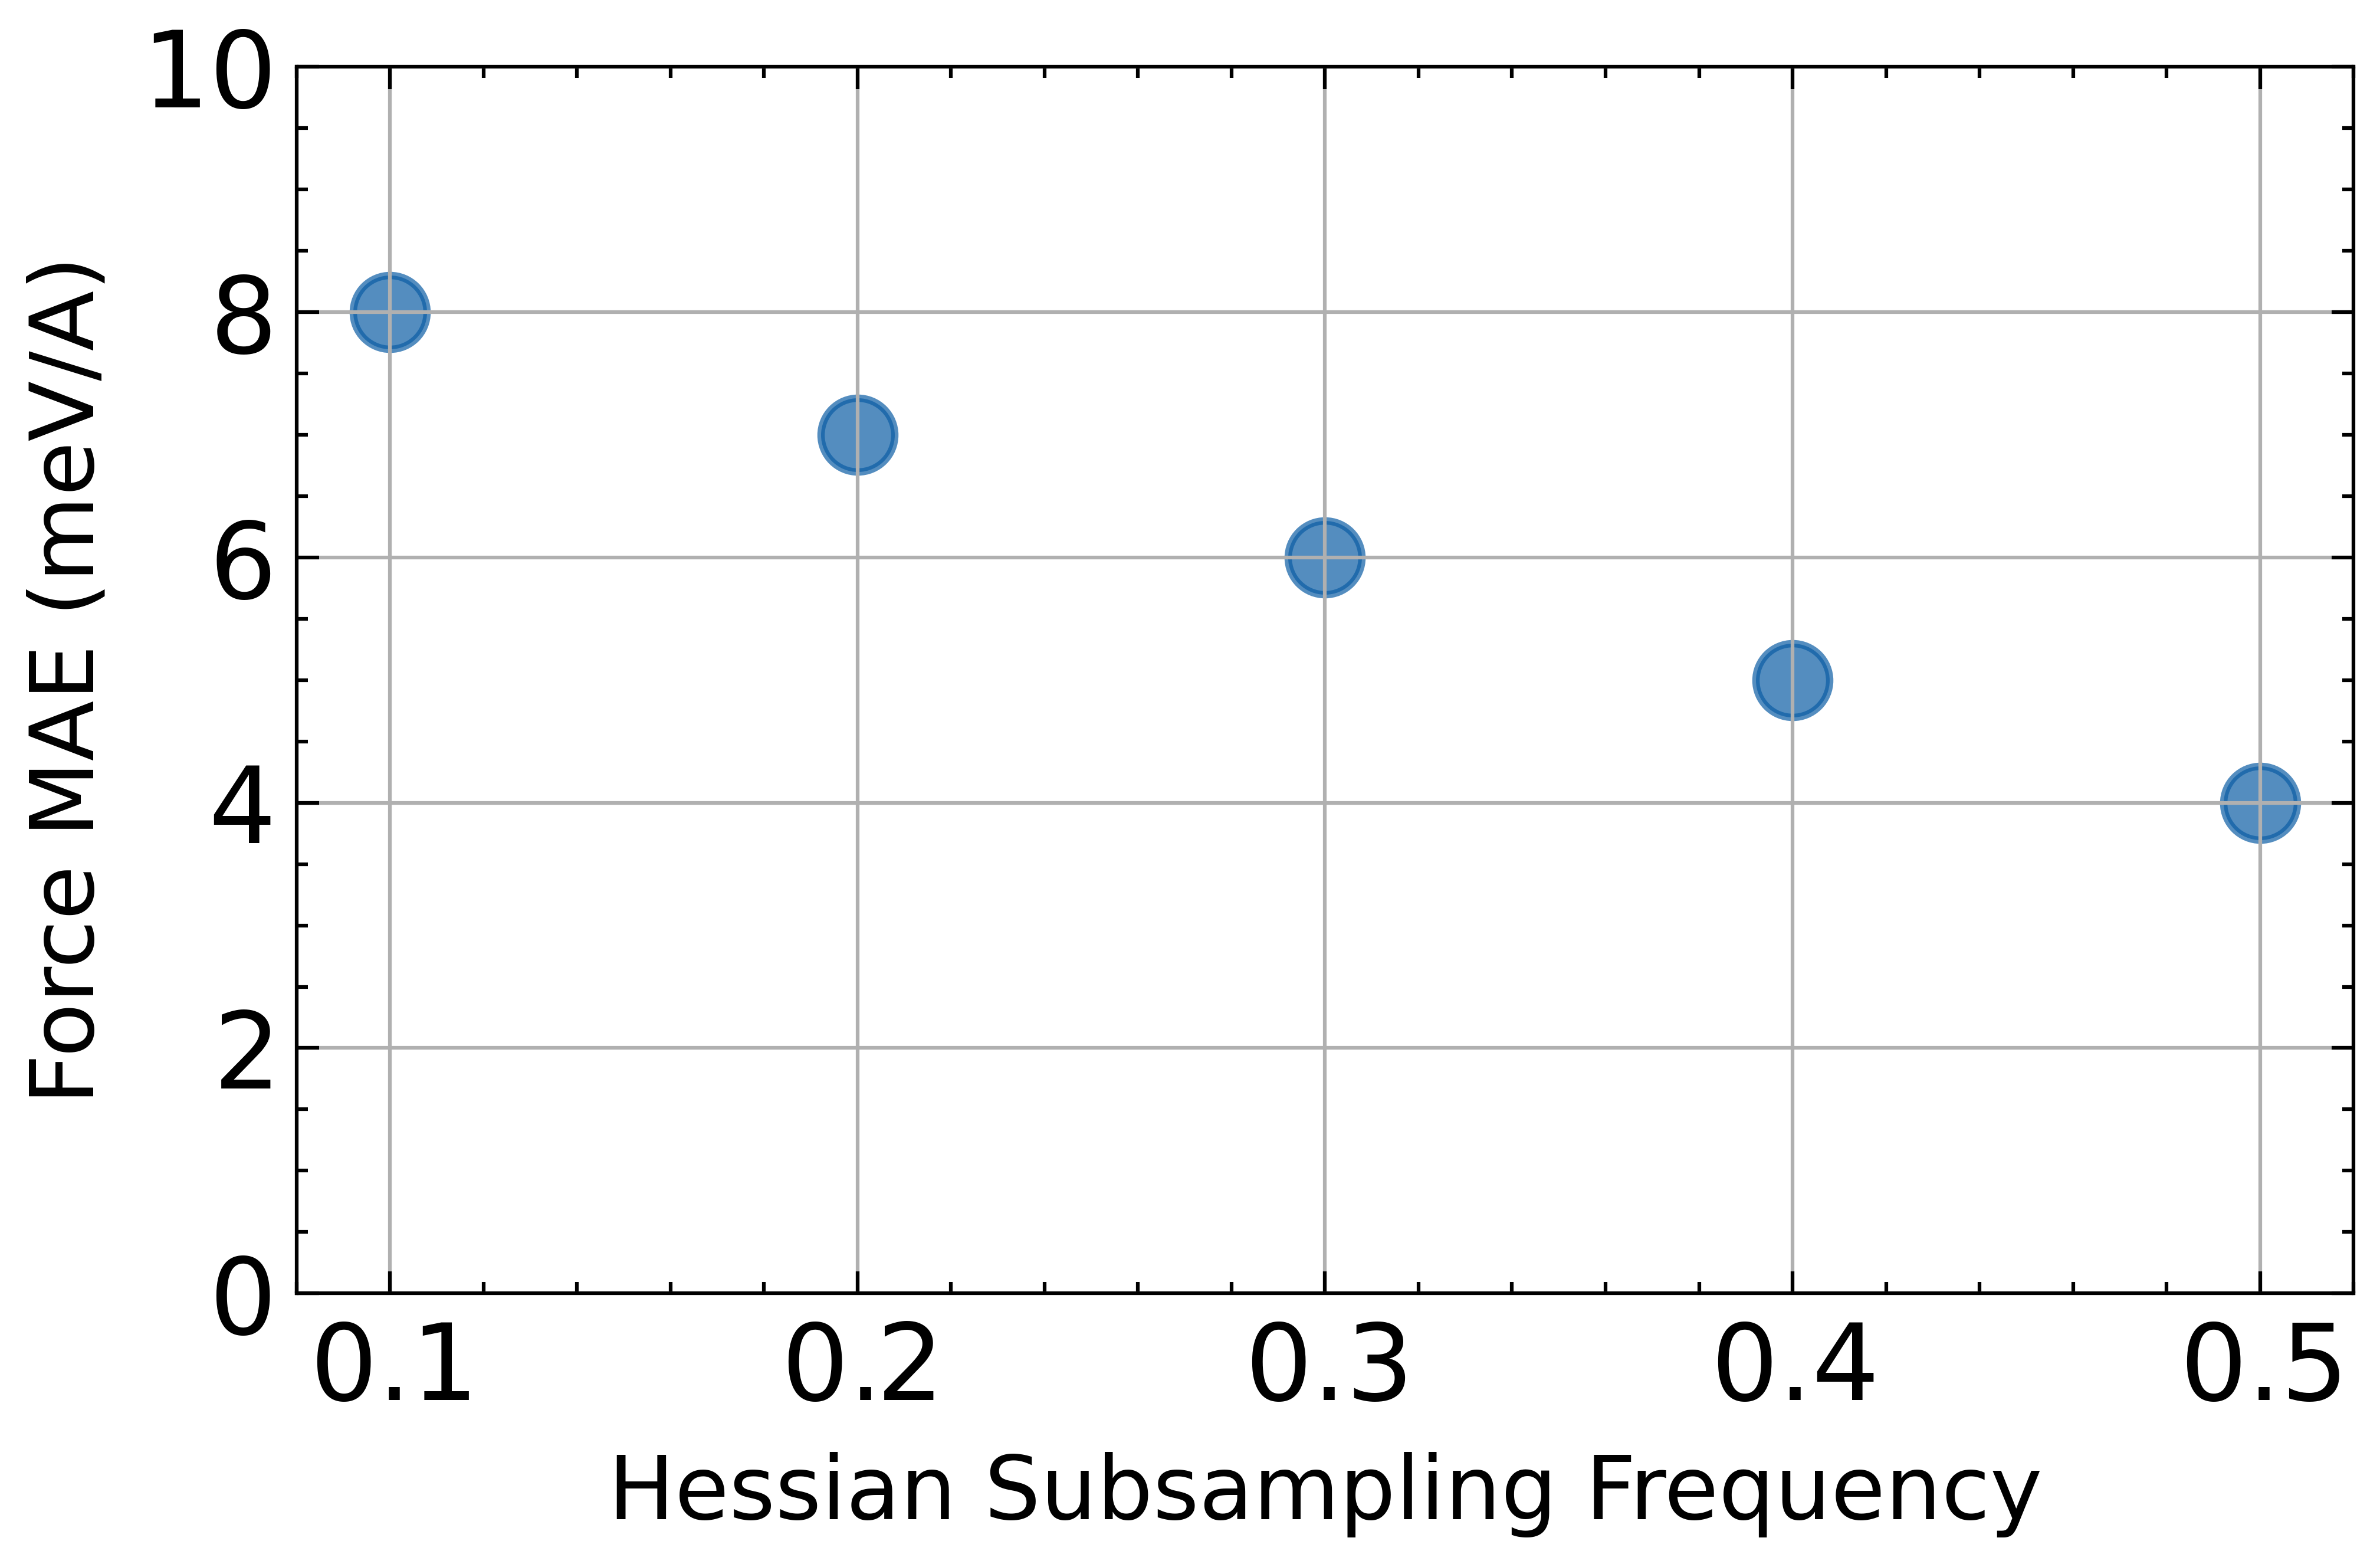

In [14]:


subsampling_freq = [0.10, 0.20, 0.30, 0.40, 0.50]
errors = [8, 7, 6, 5, 4]


plt.figure(figsize=(5, 3))

plt.scatter(subsampling_freq, errors, 
            marker='o', 
            s=100,
            alpha=0.7)

# Add grid to the background
plt.grid(True)
plt.xlabel('Hessian Subsampling Frequency', fontsize=12)
plt.ylabel('Force MAE (meV/A)', fontsize=12)
plt.ylim(0, 10)


plt.savefig('subsampling_vs_error.png')
plt.show()
plt.close()


